# Dataset information

 The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods. Two datasets were combined and few values were randomly removed.

 # Attribute Information:
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10) 

## Importing Modules:

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
# Loading the datasets:
df = pd.read_csv("../Datasets/WineQT.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [5]:
#statistical info
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [6]:
#datatype info
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

## PreProcessing the datasets

In [15]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [20]:
# fill the missing values
for col, value in df.items():
    if col != 'type':
        df[col] = df[col].fillna(df[col].mean())

In [22]:
# checking for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

## Exploratory data analysis

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Asus\anaconda3\envs\texas\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Asus\AppData\Local\Temp\ipykernel_17604\887006044.py", line 9, in <module>
    sns.boxplot(y=col,data=df,ax=ax[index])
IndexError: index 12 is out of bounds for axis 0 with size 12

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\Asus\anaconda3\envs\texas\lib\site-packages\IPython\core\interactiveshell.py", line 2102, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "c:\Users\Asus\anaconda3\envs\texas\lib\site-packages\IPython\core\ultratb.py", line 1310, in structured_traceback
    return FormattedTB.structured_traceback(
  File "c:\Users\Asus\anaconda3\envs\texas\lib\site-packages\IPython\core\ultratb.py", line 1199, in structured_traceback
    return VerboseTB.stru

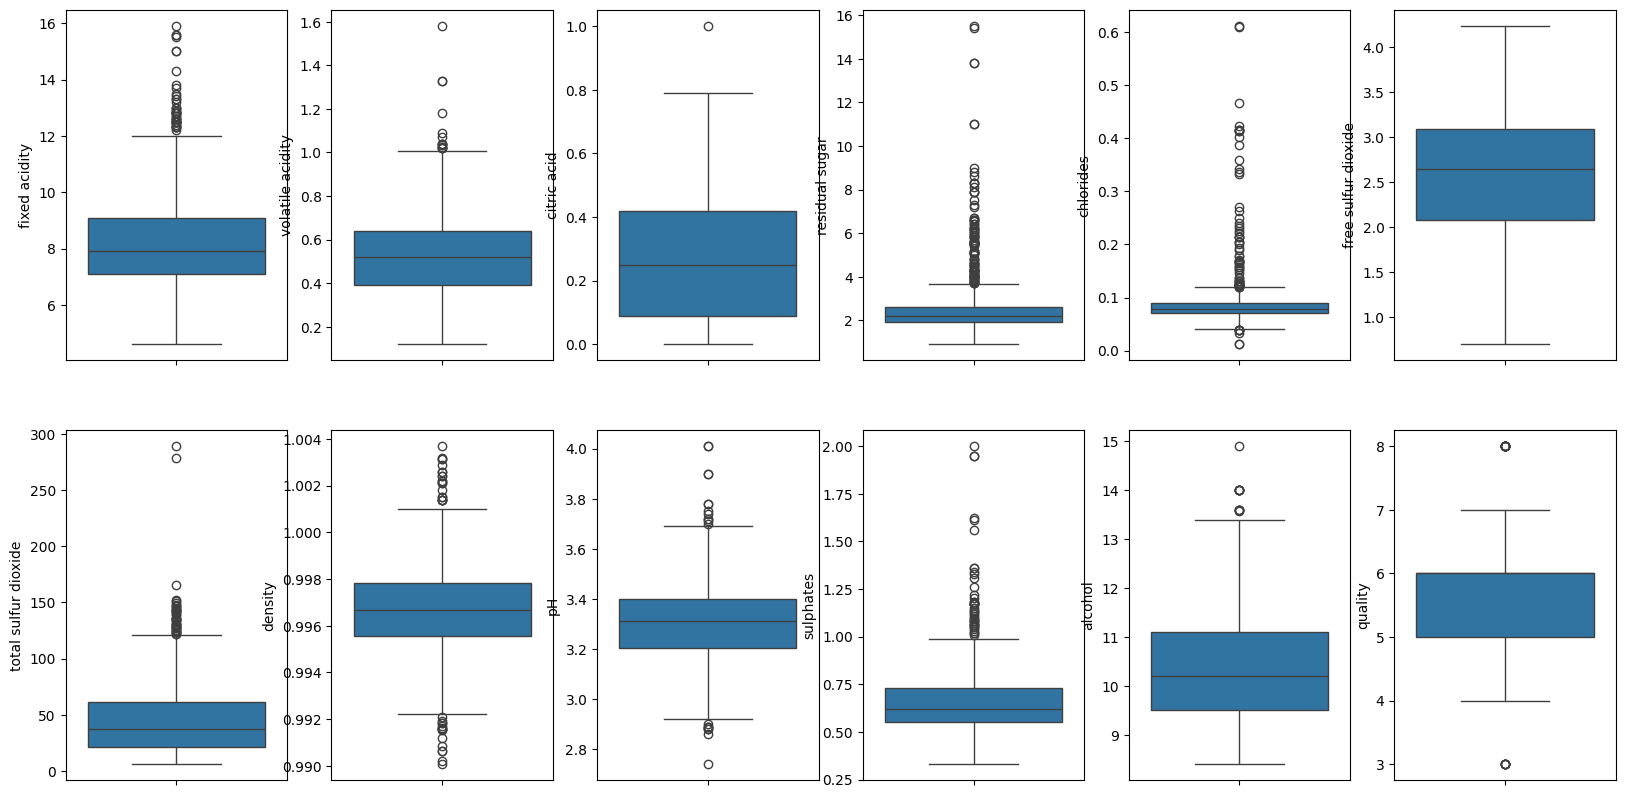

In [23]:
# create box plots

fig,ax = plt.subplots(ncols=6 , nrows=2 , figsize=(20,10))
index = 0
ax = ax.flatten()

for col,value in df.items():
    if col != 'type':
        sns.boxplot(y=col,data=df,ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7,h_pad=5.0)

    

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Asus\anaconda3\envs\texas\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Asus\AppData\Local\Temp\ipykernel_17604\564363008.py", line 8, in <module>
    sns.distplot(value, ax=ax[index])
IndexError: index 12 is out of bounds for axis 0 with size 12

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\Asus\anaconda3\envs\texas\lib\site-packages\IPython\core\interactiveshell.py", line 2102, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "c:\Users\Asus\anaconda3\envs\texas\lib\site-packages\IPython\core\ultratb.py", line 1310, in structured_traceback
    return FormattedTB.structured_traceback(
  File "c:\Users\Asus\anaconda3\envs\texas\lib\site-packages\IPython\core\ultratb.py", line 1199, in structured_traceback
    return VerboseTB.structured

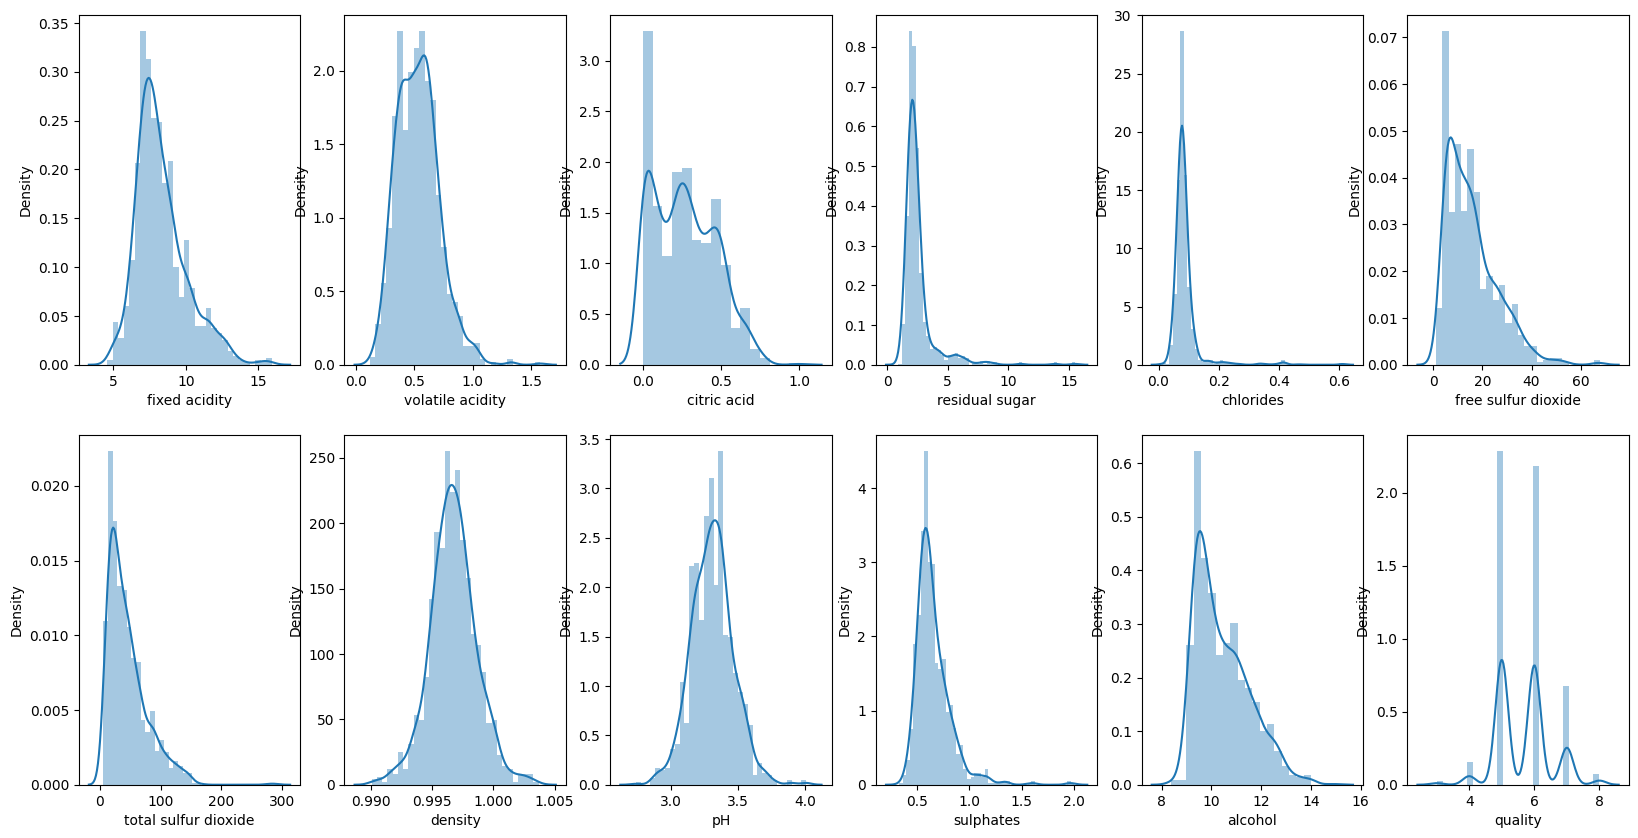

In [10]:
# create dist plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [24]:
# log transformation
df['free sulfur dioxide'] = np.log(1 + df['free sulfur dioxide'])

<Axes: xlabel='free sulfur dioxide', ylabel='Density'>

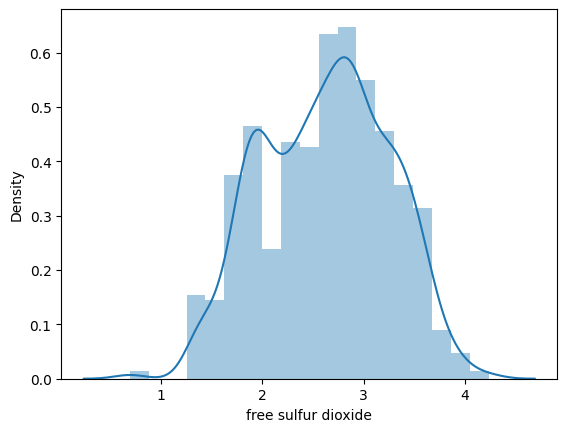

In [12]:
sns.distplot(df['free sulfur dioxide'])

In [29]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

<Axes: xlabel='quality', ylabel='Count'>

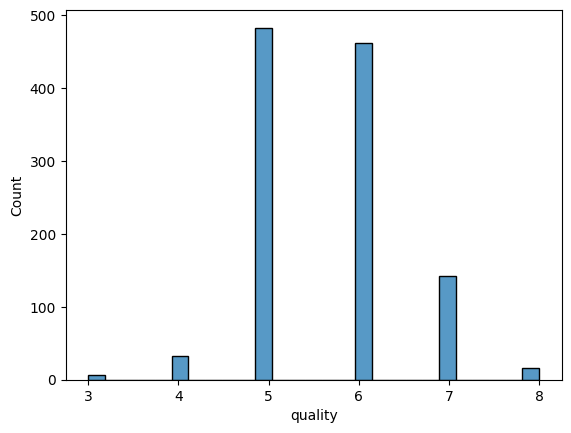

In [30]:
sns.histplot(df['quality'])

<Axes: >

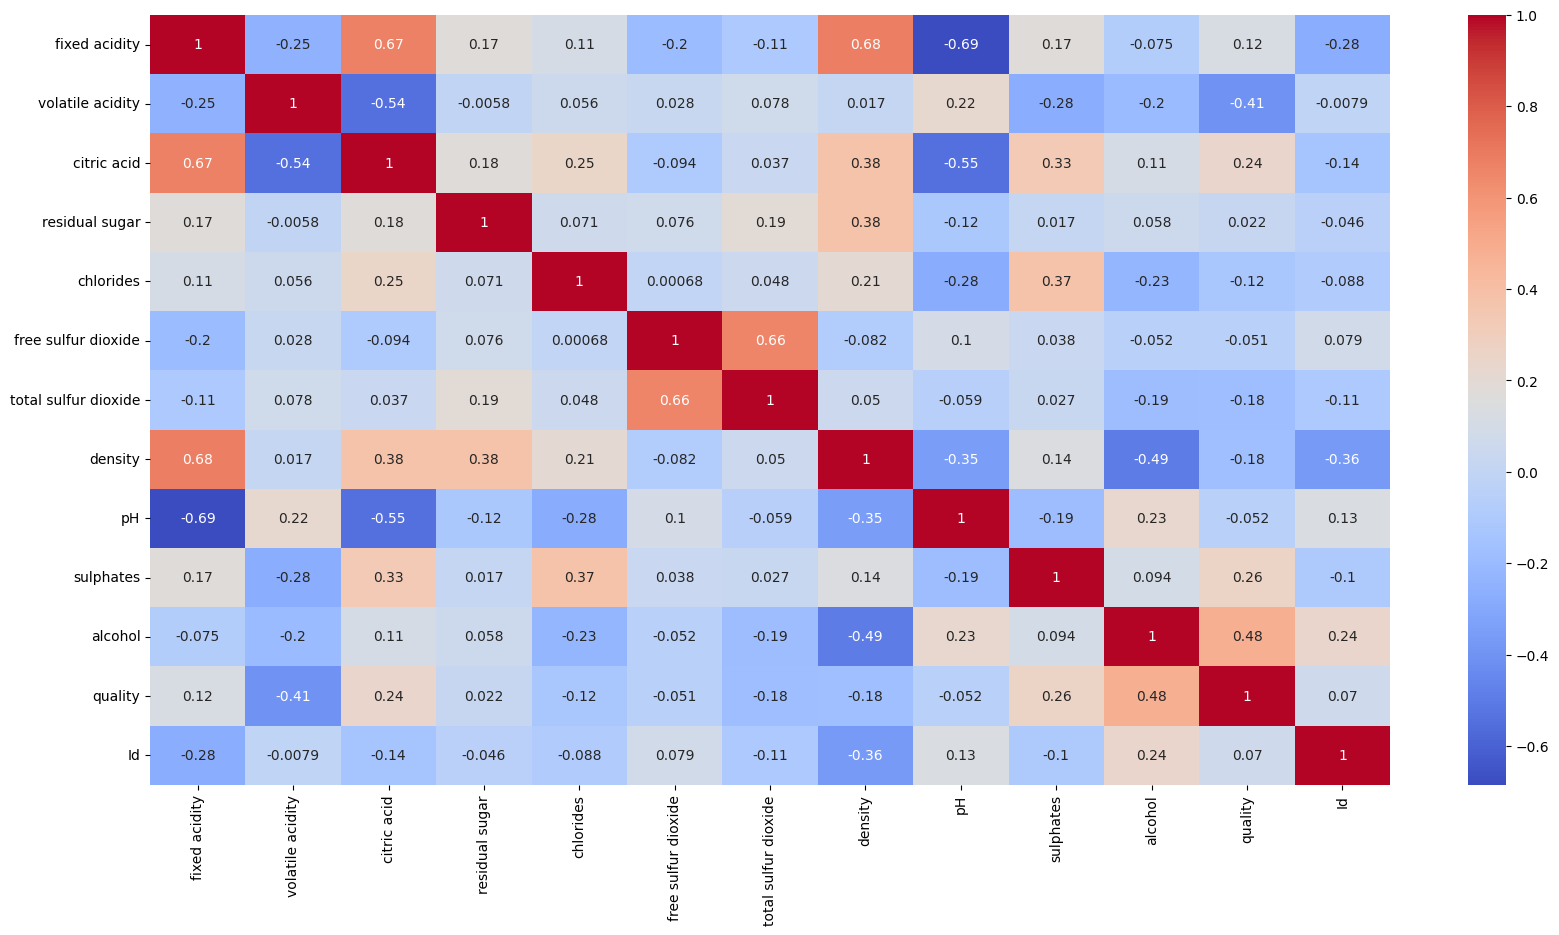

In [31]:
# coorelation
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [32]:
x = df.drop('quality', axis = 1)
y = df['quality']

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [36]:
# Applying Standard Scaler to get optimized result
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


In [37]:
#Random forest classfier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)

In [38]:
# Rfc Model performance 
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.74      0.80      0.77        96
           6       0.65      0.71      0.68        99
           7       0.71      0.46      0.56        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.42      0.39      0.40       229
weighted avg       0.67      0.69      0.68       229



In [39]:
print(confusion_matrix(y_test, pred_rfc))

[[ 0  3  3  0  0]
 [ 0 77 19  0  0]
 [ 0 24 70  5  0]
 [ 0  0 14 12  0]
 [ 0  0  2  0  0]]


In [40]:
clf = SVC()
clf.fit(x_train, y_train)
pred_clf = clf.predict(x_test)

In [41]:
print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.69      0.76      0.72        96
           6       0.59      0.67      0.63        99
           7       0.58      0.27      0.37        26
           8       0.00      0.00      0.00         2

    accuracy                           0.64       229
   macro avg       0.37      0.34      0.34       229
weighted avg       0.61      0.64      0.62       229



In [42]:
print(confusion_matrix(y_test, pred_clf))

[[ 0  3  3  0  0]
 [ 0 73 23  0  0]
 [ 0 29 66  4  0]
 [ 0  1 18  7  0]
 [ 0  0  1  1  0]]


In [44]:
from sklearn.metrics import accuracy_score 
ac1 = accuracy_score(y_test, pred_rfc)
ac2 = accuracy_score(y_test, pred_clf)
ac1, ac2

(0.6943231441048034, 0.6375545851528385)